### T1. Using 3 mixtures, initialize your Gaussian with means (3,3), (2,2), and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mix- ture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration. (You may do the calculations by hand or write code to do so)



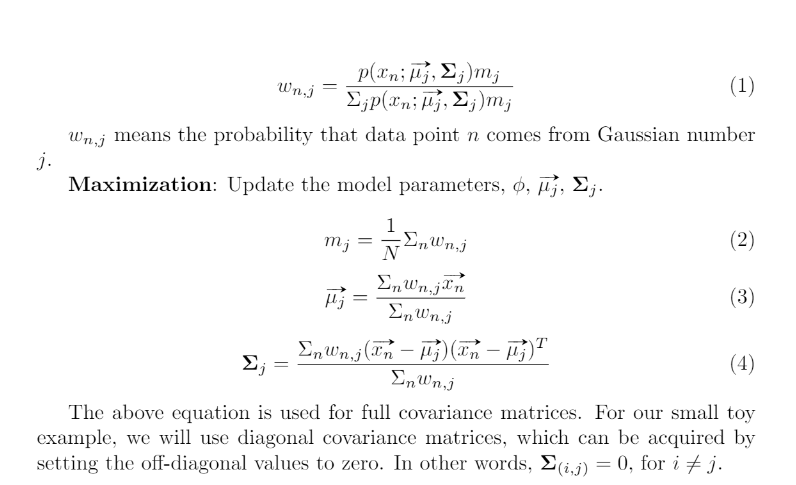

## TODO: Complete functions below including
- Fill relevant parameters in each function.
- Implement computation and return values.

These functions will be used in T1-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hint: You can use this function to get gaussian distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
from scipy.stats import multivariate_normal

In [2]:
class GMM:
    def __init__(self, mixture_weight, mean_params, cov_params):
        """
        Initialize GMM.
        """
        # Copy construction values.
        self.mixture_weight = mixture_weight
        self.mean_params = mean_params
        self.cov_params = cov_params

        # Initiailize iteration.
        self.n_iter = 0

    def estimation_step(self, data):
        """
        TODO: Perform estimation step. Then, return w_{n,j} in eq. 1)
        """

        # INSERT CODE HERE
        num_components = len(self.mixture_weight)
        num_data_points = data.shape[0]

        # Compute the probabilities for each component and normalize weights
        prob_x_given_params = np.zeros((num_data_points, num_components))

        for j in range(num_components):
            prob_x_given_params[:, j] = multivariate_normal.pdf(
                x=data, 
                mean=self.mean_params[j], 
                cov=self.cov_params[j]
            ) * self.mixture_weight[j]

        # Normalize to calculate responsibilities
        sum_over_components = np.sum(prob_x_given_params, axis=1, keepdims=True)
        w = prob_x_given_params / sum_over_components
        return w


    def maximization_step(self, data, w):
        """
        TODO: Perform maximization step.
            (Update parameters in this GMM model.)
        """
        # INSERT CODE HERE
        
        N, D = data.shape  # N: number of data points, D: dimensionality of data
        num_components = len(self.mixture_weight)
        
        # Update mixture weights (mj)         
        Nk = np.sum(w, axis=0)  # Sum of responsibilities for each component
        self.mixture_weight = Nk / N  # mj = 1/N * sum_n w_n,j
        
        # Update means (mu_j)
        self.mean_params = np.dot(w.T, data) / Nk[:, np.newaxis]  # mu_j = (sum_n w_n,j * x_n) / sum_n w_n,j
        
        # Update covariances (Sigma_j)
        self.cov_params = []
        for j in range(num_components):
            diff = data - self.mean_params[j]  # x_n - mu_j
            weighted_diff = w[:, j][:, np.newaxis] * diff  # w_n,j * (x_n - mu_j)
            cov_j = np.dot(weighted_diff.T, diff) / Nk[j]  # Sigma_j = (sum_n w_n,j * (x_n - mu_j) * (x_n - mu_j)^T) / sum_n w_n,j
            diag_cov_j = cov_j * np.eye(D)
            self.cov_params.append(diag_cov_j)
        self.cov_params = np.array(self.cov_params)
            

    def get_log_likelihood(self, data):
        """
        TODO: Compute log likelihood.
        """
        # INSERT CODE HERE
        num_components = len(self.mixture_weight)
        num_data_points = data.shape[0]

        # Compute the probabilities for each component
        prob_x_given_params = np.zeros((num_data_points, num_components))

        for j in range(num_components):
            prob_x_given_params[:, j] = multivariate_normal.pdf(
                x=data,
                mean=self.mean_params[j],
                cov=self.cov_params[j]
            ) * self.mixture_weight[j]

        # Compute total probability for each data point
        epsilon = 1e-10
        total_prob = np.sum(prob_x_given_params, axis=1) + epsilon
        log_prob = np.sum(np.log(total_prob))


        # Log likelihood: sum over all data points
        log_prob = np.sum(np.log(total_prob))
        return log_prob

    def print_iteration(self):
        print("m :\n", self.mixture_weight)
        print("mu :\n", self.mean_params)
        print("covariance matrix :\n", self.cov_params)
        print("-------------------------------------------------------------")

    def perform_em_iterations(self, data, num_iterations, display=True):
        """
        Perform estimation & maximization steps with num_iterations.
        Then, return list of log_likelihood from those iterations.
        """
        log_prob_list = []

        # Display initialization.
        if display:
            print("Initialization")
            self.print_iteration()

        for n_iter in range(num_iterations):

            # TODO: Perform EM step.

            # INSERT CODE HERE
            # Estimation step: calculate responsibilities (w)
            w = self.estimation_step(data)

            # Maximization step: update parameters based on responsibilities
            self.maximization_step(data, w)

            # Calculate log prob.
            log_likelihood = self.get_log_likelihood(data)
            log_prob_list.append(log_likelihood)

            # Display each iteration.
            if display:
                print(f"Iteration: {n_iter}")
                self.print_iteration()

        return log_prob_list

In [3]:
num_iterations = 3
num_mixture = 3
mixture_weight = [1] * num_mixture # m
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T
# print(np.cov(data))
# print("mm", np.matmul(data,data) )
gmm = GMM(mixture_weight, mean_params, cov_params)
log_prob_list = gmm.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1, 1, 1]
mu :
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.45757242 0.20909425 0.33333333]
mu :
 [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
covariance matrix :
 [[[4.53619412 0.        ]
  [0.         4.28700611]]

 [[0.51645579 0.        ]
  [0.         0.13152618]]

 [[4.66666668 0.        ]
  [0.         2.88888891]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.40711618 0.25954961 0.33333421]
mu :
 [[ 6.27176215  6.27262711]
 [ 1.72091544  2.14764812]
 [-3.99998589 -4.6666488 ]]
covariance matrix :
 [[[2.94672736 0.        ]
  [0.         2.93847196]]

 [[0.49649261 0.        ]
  [0.         0.12584815]]

 [[4.66673088 0.        ]
  [0.         2.88900236]]]
-------------------------------------------------------------
Iteration

### T2. Plot the log likelihood of the model given the data after each EM step. In other words, plot $\log \prod_n p( \vec{x_n} |φ, \vec{μ} , Σ)$. Does it goes up every iteration just as we learned in class?



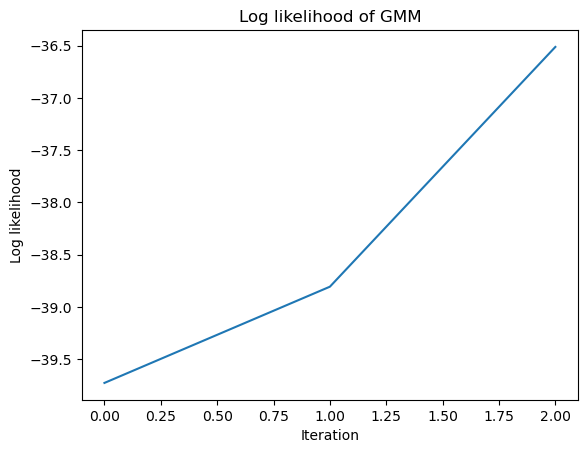

In [4]:
# TODO

def plot_log_likelihood(log_prob_list, plt_name):
    plt.plot(log_prob_list)
    plt.title(plt_name)
    plt.xlabel("Iteration")
    plt.ylabel("Log likelihood")
    plt.show()
    
plot_log_likelihood(log_prob_list, "Log likelihood of GMM")

    ANS :

### T3. Using 2 mixtures, initialize your Gaussian with means (3,3) and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mixture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration.



In [5]:
num_mixture = 2
mixture_weight = [1] * num_mixture

mean_params = np.array([[3,3], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
gmm2 = GMM(mixture_weight, mean_params, cov_params)
log_prob_list2 = gmm2.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1, 1]
mu :
 [[ 3.  3.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.66666666 0.33333334]
mu :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covariance matrix :
 [[[6.91666665 0.        ]
  [0.         5.88888889]]

 [[4.66666677 0.        ]
  [0.         2.8888891 ]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.66669436 0.33330564]
mu :
 [[ 4.49961311  4.66620178]
 [-3.99993241 -4.66651231]]
covariance matrix :
 [[[6.91944755 0.        ]
  [0.         5.89275124]]

 [[4.66806942 0.        ]
  [0.         2.89103318]]]
-------------------------------------------------------------
Iteration: 2
m :
 [0.66669453 0.33330547]
mu :
 [[ 4.49961084  4.66619903]
 [-3.99993206 -4.66651141]]
covariance matrix :
 [[[6.91946372 0.        ]
  [0.         5.8927741 ]]

 [[4.66807754 0.        ]
  [0.         2.89104566]

### T4. Plot the log likelihood of the model given the data after each EM step. Compare the log likelihood between using two mixtures and three mixtures. Which one has the better likelihood?

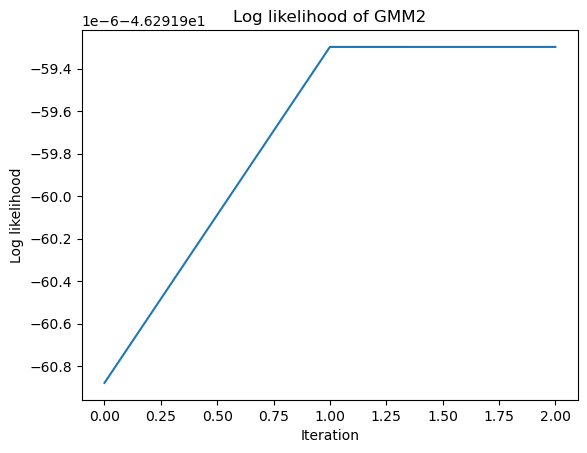

In [6]:
# TODO: Plot log_likelihood from T3
plot_log_likelihood(log_prob_list2, "Log likelihood of GMM2")

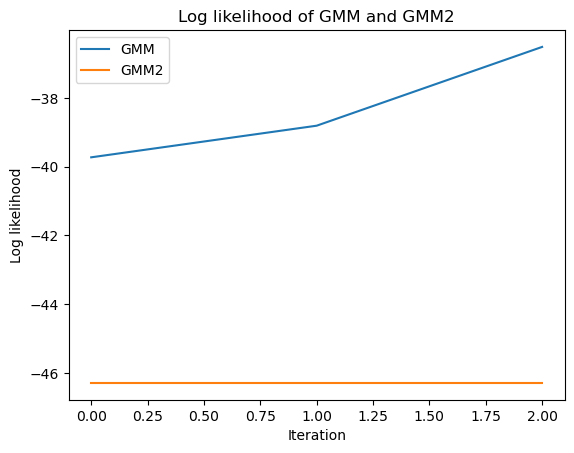

In [7]:
# TODO: Plot Comparision of log_likelihood from T1 and T3
#plot on the same figure
plt.plot(log_prob_list, label="GMM")
plt.plot(log_prob_list2, label="GMM2")
plt.title("Log likelihood of GMM and GMM2")
plt.xlabel("Iteration")
plt.ylabel("Log likelihood")
plt.legend()
plt.show()


    ANS :

# The face database

In [8]:
# Download facedata for google colab
# !wget -nc https://github.com/ekapolc/Pattern_2024/raw/main/HW/HW03/facedata_mat.zip
# !unzip /home/jeans/PATT_RECOG-REQUIEM/HW/HW03/facedata_mat.zip

In [9]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

# Change path to your facedata.mat file.
facedata_path = '/home/jeans/PATT_RECOG-REQUIEM/HW/HW03/facedata.mat'

data = scipy.io.loadmat(facedata_path)
print(data.keys())
data_size = data['facedata'].shape

%matplotlib inline
print("(i th person , j th image)")
data_size

dict_keys(['__header__', '__version__', '__globals__', 'facedata'])
(i th person , j th image)


(40, 10)

### Preprocess xf

In [10]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

(56, 46)


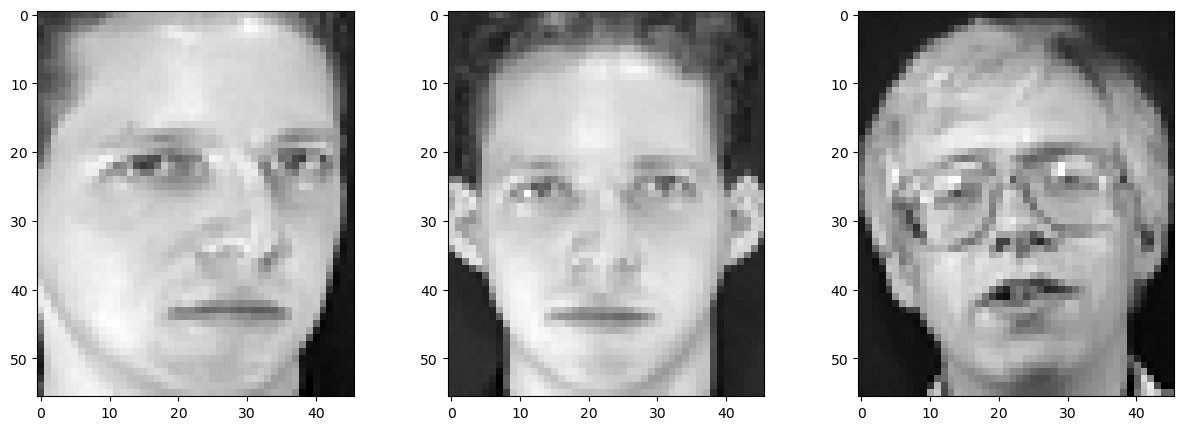

In [11]:
# Example: Ploting face image.
print(xf[0,0].shape)

#plt in 3 column 1 row
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.imshow(xf[0,1], cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(xf[0,0], cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(xf[1,0], cmap = 'gray')
plt.show()

### T5. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification?

In [12]:
def L2_dist(x1, x2):
    """
    TODO: Calculate L2 distance.
    """
    #caluclate l2 distance between x1 and x2
    l2 = np.sqrt(np.sum((x1 - x2) ** 2))
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert  L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


In [13]:
# TODO: Show why does the numbers make sense
# BG color black bro

    ANS :

### T6. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and then output the similarity matrix A. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list D (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat T as our training images and D as our testing images

In [14]:

def organize_shape(matrix):
    """
    TODO (Optional): Reduce matrix dimension of 2D image to 1D and merge people and image dimension.
    This function can be useful at organizing matrix shapes.

    Example:
        Input shape: (people_index, image_index, image_shape[0], image_shape[1])
        Output shape: (people_index*image_index, image_shape[0]*image_shape[1])
    """
    # INSERT CODE HERE
    organized_matrix = matrix.reshape(-1, matrix.shape[2] * matrix.shape[3])
    return organized_matrix


def generate_similarity_matrix(A, B):
    """
    TODO: Calculate similarity matrix M,
    which M[i, j] is a distance between A[i] and B[j].
    """

    # INSERT CODE HERE
    similarity_matrix = np.zeros((A.shape[0], B.shape[0]))
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            similarity_matrix[i, j] = L2_dist(A[i], B[j])
    
    return similarity_matrix

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2],[3,4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all()

def train_test_split(data, train_image_per_person=3):
    """
    Split data into train and test set.
    """
    # Split data into train and test set.
    train_data = data[:, :train_image_per_person]
    test_data = data[:, train_image_per_person:]
    print("Train data shape:", train_data.shape)
    print("Test data shape:", test_data.shape)
    return train_data, test_data

test_generate_similarity_matrix()

Train data shape: (40, 3, 56, 46)
Test data shape: (40, 7, 56, 46)
(120, 2576) (280, 2576)
(120, 280)


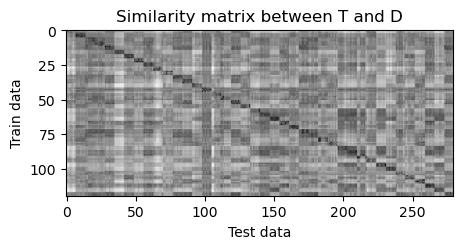

In [15]:
#TODO: Show similariry matrix between T and D.

# INSERT CODE HERE
T, D = train_test_split(xf)
T, D = organize_shape(T), organize_shape(D)
print(T.shape, D.shape)
similarity_matrix = generate_similarity_matrix(T, D)
print(similarity_matrix.shape)
#plot the similarity matrix
plt.figure(figsize=(5, 5))
plt.imshow(similarity_matrix, cmap='gray')
plt.title("Similarity matrix between T and D")
plt.ylabel("Train data")
plt.xlabel("Test data")
plt.show()

### T7. From the example similarity matrix above, what does the black square between [5:10,5:10] suggest about the pictures from person number 2? What do the patterns from person number 1 say about the images from person 1?


In [16]:
# INSERT CODE HERE

        ANS :

### T8. Write a function that takes in the similarity matrix created from the previous part, and a threshold t as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people, a total of 11200 testing per threshold). What is the true positive rate and the false alarm rate for t = 10?

In [19]:
def evaluate_performance(similarity_matrix, threshold):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """
    #True Positive : model predict True and actual is also True
    TP = 0
    #False Negative : model predict False but actual is True
    FN = 0
    #True Negative : model predict False and the actual is False
    TN = 0
    #False Positive : model predict True but the actual is False
    FP = 0

    min_dist_matrix = np.zeros((40, similarity_matrix.shape[1]), dtype = int)
    min_dist_matrix = np.min(similarity_matrix.reshape((-1, 3, similarity_matrix.shape[1])), axis = 1)
    threshold_matrix = (min_dist_matrix < threshold).astype(int)

    total_pred = threshold_matrix.shape[0]
    total_label = threshold_matrix.shape[1]

    for i in range(40):
        #since each i_th person = col_index // 7
        TP += np.sum(threshold_matrix[i, 7*i : 7*i + 7])

    #false positive = total true predict - true positive
    FP = np.sum(threshold_matrix) - TP

    #false negative = all the actual true label(each 1 img has 1 true label) - true positive prediction
    FN = total_label - TP
    negative_pred = (total_pred*total_label) - TP-FP
    TN = negative_pred - FN

    #truePosRate = TP / all true label
    true_pos_rate = TP/(TP+FN)
    #false_alarm_rate = FP / All Negative true label
    false_alarm_rate = FP / (FP + TN )

    return true_pos_rate, false_alarm_rate
# Quick check
# (true_pos_rate, false_neg_rate) should be (0.9928571428571429, 0.33507326007326005)
evaluate_performance(similarity_matrix, 9.5)

(np.float64(0.9928571428571429), np.float64(0.33507326007326005))

In [20]:
# INSERT CODE HERE

        ANS:

### T9. Plot the RoC curve for this simple verification system. What should be the minimum threshold to generate the RoC curve? What should be the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [21]:
# INSERT CODE HERE
min_thresh = 0.0
max_thresh = 56*46 // 100
thresholds = np.linspace(min_thresh, max_thresh, 1000)
    
def calculate_roc(input_mat, thresholds=thresholds):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_pos_rate from the given matrix.
    """
        
    tpr_list = []
    far_list = []
    
    for threshold in thresholds:
        tpr, far = evaluate_performance(input_mat, threshold)
        tpr_list.append(tpr)
        far_list.append(far)
    
    return tpr_list, far_list

def plot_roc(input_mat):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    # INSERT CODE HERE
    tpr_list, far_list = calculate_roc(input_mat)
    plt.plot(far_list, tpr_list)
    plt.title("RoC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    

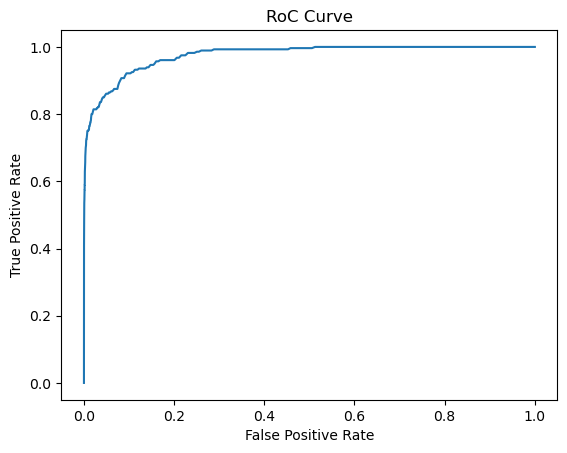

In [22]:
# INSERT CODE HERE
plot_roc(similarity_matrix)

    ANS:

### T10. What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false alarm rate? (Write this in the same function as the previous question)



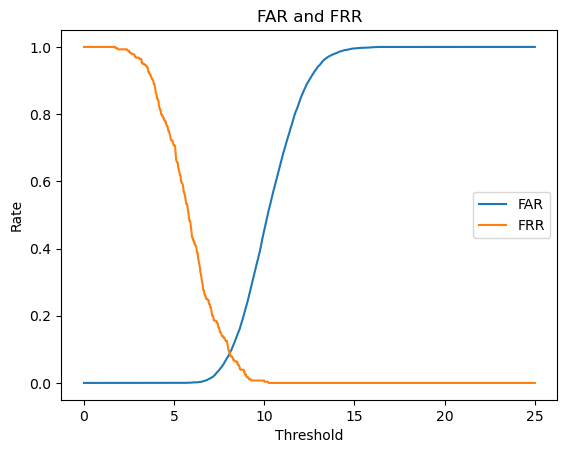

0.9071428571428571


(np.float64(0.0908882783882784), np.float64(8.083083083083084))

In [25]:
# You can add more parameter(s) to the function in the previous question.

def calculate_eer(tpr_list, far_list, thresholds=thresholds):
    """
    Calculate the Equal Error Rate (EER) given TPR and FAR lists.

    Parameters:
    -----------
    tpr_list : list or np.ndarray
        List of True Positive Rates for each threshold.
    far_list : list or np.ndarray
        List of False Alarm (False Accept) Rates for each threshold.
    thresholds : list or np.ndarray
        Thresholds corresponding to each TPR/FAR pair.

    Returns:
    --------
    eer : float
        The Equal Error Rate (FAR = FRR).
    eer_threshold : float
        The threshold at which FAR = FRR.
    """
    # Convert to arrays for easier manipulation
    tpr = np.array(tpr_list)
    far = np.array(far_list)
    
    # FRR = 1 - TPR
    frr = 1 - tpr

    # 1. Find index where difference (FAR - FRR) is minimal
    abs_diff = np.abs(far - frr)
    min_index = np.argmin(abs_diff)
    print(tpr[min_index])
    # 2. Optionally do linear interpolation around min_index for better EER approximation.
    #    But, as a simple approach, pick the nearest:
    eer_threshold = thresholds[min_index]
    
    # 3. The EER (the rate) is either FAR or FRR at that point (they should be approximately equal).
    eer = (far[min_index] + frr[min_index]) / 2.0

    return eer, eer_threshold
tpr_list, far_list = calculate_roc(similarity_matrix)
#plot flase alarm rate and false rejection rate as percent as 2 lines in range 0 to 1

plt.plot(thresholds, far_list, label="FAR")
plt.plot(thresholds,(1 - np.array(tpr_list)), label="FRR")
plt.title("FAR and FRR")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.show()

calculate_eer(tpr_list, far_list)
# EER should be either 0.9071428571428571 or 0.9103759398496248 depending on method.
# Recall rate at 0.1% false alarm rate should be 0.5428571428571428.

    ANS:

### T11. Compute the mean vector from the training images. Show the vector as an image (use numpy.reshape()). This is typically called the meanface (or meanvoice for speech signals). You answer should look exactly like the image shown below.

In [41]:
# INSERT CODE HERE
meanface = ...

### T12. What is the size of the covariance matrix? What is the rank of the covariance matrix?


In [42]:
# TODO: Find the size and the rank of the covariance matrix.

    ANS:


### T13. What is the size of the Gram matrix? What is the rank of Gram matrix? If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?

In [24]:
# TODO: Compute gram matrix.
gram_matrix = ...

In [25]:
# TODO: Show size and rank of Gram matrix.

    ANS:


## T14. Is the Gram matrix also symmetric? Why?


    ANS:

### T15. Compute the eigenvectors and eigenvalues of the Gram matrix, v 0 and λ. Sort the eigenvalues and eigenvectors in descending order so that the first eigenvalue is the highest, and the first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.




In [ ]:
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

def calculate_eigenvectors_and_eigenvalues(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """

    # INSERT CODE HERE

    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

NameError: name 'eigenvalues' is not defined

    ANS:

### T16. Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues is the size of the variance for each eigenvector direction. If I want to keep 95% of the variance in the data, how many eigenvectors should I use?

In [ ]:
# INSERT CODE HERE

    ANS:

### T17. Compute $\vec{v}$ . Don’t forget to renormalize so that the norm of each vector is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as images. Two example eigenvectors are shown below. We call these images eigenfaces (or eigenvoice for speech signals).

In [ ]:
# TODO: Compute v, then renormalize it.

# INSERT CODE HERE

v = ...

In [ ]:
def test_eignevector_cov_norm(v):
    assert (np.round(np.linalg.norm(v, axis=0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

In [ ]:
# TODO: Show the first 10 eigenvectors as images.

### T18. From the image, what do you think the first eigenvector captures? What about the second eigenvector? Look at the original images, do you think biggest variance are capture in these two eigenvectors?

    ANS:

### T19. Find the projection values of all images. Keep the first k = 10 projection values. Repeat the simple face verification system we did earlier using these projected values. What is the EER and the recall rate at 0.1% FAR?

In [ ]:
def calculate_projection_vectors(matrix, meanface, v):
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """

    # INSERT CODE HERE

    return projection_vectors

In [ ]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.
k = ...
T_reduced = ...
D_reduced = ...


def test_reduce_dimension():
    assert T_reduced.shape[-1] == k
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

In [ ]:
# TODO: Get similarity matrix of T_reduced and D_reduced

In [ ]:
# TODO: Find EER and the recall rate at 0.1% FAR.

    ANS:

### T20. What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.


In [ ]:
# INSERT CODE HERE

    ANS:

### T21. In order to assure that $S_W$ is invertible we need to make sure that $S_W$ is full rank. How many PCA dimensions do we need to keep in order for $S_W$ to be full rank? (Hint: How many dimensions does $S_W$ have? In order to be of full rank, you need to have the same number of linearly independent factors)

    ANS:

In [ ]:
# TODO: Define dimension of PCA.
n_dim = ...

# TODO: Find PCA of T and D with n_dim dimension.

### T22. Using the answer to the previous question, project the original in- put to the PCA subspace. Find the LDA projections. To find the inverse, use −1 numpy.linalg.inv. Is $S_W$ $S_B$ symmetric? Can we still use numpy.linalg.eigh? How many non-zero eigenvalues are there?


In [ ]:
# TODO: Find the LDA projection.

In [ ]:
# TODO: Find how many non-zero eigenvalues there are.

    ANS:

### T23. Plot the first 10 LDA eigenvectors as images (the 10 best projections). Note that in this setup, you need to convert back to the original image space by using the PCA projection. The LDA eigenvectors can be considered as a linear combination of eigenfaces. Compare the LDA projections with the PCA projections.

In [ ]:
# INSERT CODE HERE

### T24. The combined PCA+LDA projection procedure is called fisherface. Calculate the fisherfaces projection of all images. Do the simple face verification experiment using fisherfaces. What is the EER and recall rate at 0.1% FAR?

In [ ]:
# INSERT CODE HERE

    ANS:

### T25.Plot the RoC of all three experiments (No projection, PCA, andFisher) on the same axes. Compare and contrast the three results. Submit yourwriteup and code on MyCourseVille.

In [ ]:
# INSERT CODE HERE

    ANS: